In [1]:
import do_mpc
import numpy as np
from Kolonne_8_Boeden import template_model
from Kolonne_8_Boeden import template_simulator

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 18
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.grid'] = True

import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.rcParams["lines.linewidth"] = 3
mpl.rcParams["font.size"] = 18
mpl.rcParams["axes.grid"] = True

C:\Users\mdiba\anaconda3\lib\site-packages\do_mpc\__init__.py:104: UserWarning: It is recommended to use CasADi version 3.6.0 or higher. Future versions of do-mpc might not be compatible with older versions of CasADi.
  warnings.warn("It is recommended to use CasADi version 3.6.0 or higher. Future versions of do-mpc might not be compatible with older versions of CasADi.")


Build model and simulator using template functions

In [2]:
model = template_model()
simulator = template_simulator(model)
# simulator.z0["e0_V_L_st9"] = 
# simulator.u0["e0_greek_gamma_st0_i1"] = 0
simulator.u0["e0_greek_sigma_R"] = 100
params_simulator = {
    "integration_tool": "idas",
    "abstol": 1e-3,
    "reltol": 1e-3,
    "t_step": 0.005,
}
simulator.set_param(**params_simulator)
simulator.setup()
simulator.set_initial_guess()

Manually set control and system state

In [3]:
# step_num = 5000
step_num = 20000 #17000
for step in range(step_num):
#     simulator.u0["e0_greek_gamma_st0_i1"] = 0
    u0 = simulator.u0.master
    simulator.make_step(u0)

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:852: Linear solve failed
psetup fai

RuntimeError: .../casadi/interfaces/sundials/idas_interface.cpp:591: IDASolve returned "IDA_CONV_FAIL". Consult IDAS documentation.

In [4]:
print(step)

17038


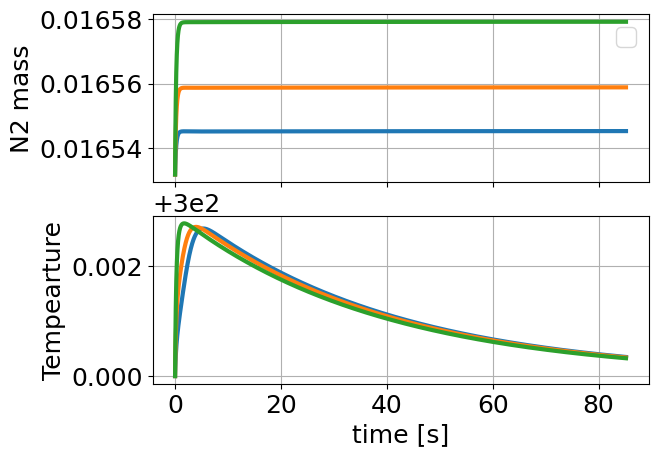

In [6]:
sim_graphics1 = do_mpc.graphics.Graphics(simulator.data)
sim_graphics2 = do_mpc.graphics.Graphics(simulator.data)

fig, ax = plt.subplots(2, sharex=True)
sim_graphics1.add_line(var_type='_x', var_name='e0_HU_st2_i3', axis=ax[0])
sim_graphics1.add_line(var_type='_x', var_name='e0_HU_st4_i3', axis=ax[0])
sim_graphics1.add_line(var_type='_x', var_name='e0_HU_st7_i3', axis=ax[0])

sim_graphics2.add_line(var_type='_z', var_name='e0_T_st2', axis=ax[1])
sim_graphics2.add_line(var_type='_z', var_name='e0_T_st4', axis=ax[1])
sim_graphics2.add_line(var_type='_z', var_name='e0_T_st7', axis=ax[1])

ax[0].set_ylabel('N2 mass')
ax[1].set_ylabel('Tempearture')
ax[1].set_xlabel('time [s]')

sim_graphics1.plot_results()
#sim_graphics2.plot_results()

lines0 = sim_graphics1.result_lines['_x', 'e0_HU_st2_i2']+sim_graphics1.result_lines['_x', 'e0_HU_st4_i2']+sim_graphics1.result_lines['_x', 'e0_HU_st7_i2']
ax[0].legend(lines0,'247')

# lines1 = sim_graphics2.result_lines['_z', 'e0_T_st2']+sim_graphics2.result_lines['_z', 'e0_T_st2']+sim_graphics2.result_lines['_z', 'e0_T_st2']
# ax[1].legend(lines1,'247')

In [16]:
# model._z["e0_V_L_st9"]
model.x.keys()
model.z["e0_V_L_st9"]
print(simulator.z0["e0_V_L_st9"])
print(simulator.z0["e0_V_V_st9"])
simulator.u0["e0_greek_gamma_st0_i1"]
print(simulator.u0["e0_V_tot_st9"])
simulator.u0["e0_F_L_st9"]
print(simulator.u0["e0_F_L_st9"])


3.28431e-015
0.0286
0.0286
0


In [19]:
print(simulator.z0["e0_T_st7"])
print(simulator.z0["e0_T_st4"])
print(simulator.z0["e0_T_st2"])

300
300
300
